# "Pump it Up: Data Mining the Water Table"

EDA

Jason & Tom

In [69]:
# Imports

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# EDA

This notebook explains the steps we took while performing EDA on our cleaned dataset. Whilst EDA does technically include 'data cleaning', we took the initiative to place that in it's own notebook so that the steps we took are much clearer. This notebook will present our findings on the correlation between certain features, as well as feature selection / engineering.

We both took different steps to do this, and collated our findings at the end. Cells by one author only will contain ``` Written By [Author] ``` at the top. Cells without this tag were steps taken by both of us, unless specified.

In [70]:
df = pd.read_csv("./datasets/cleaned_water.csv")

# 1 Graphing

### 1.1 Correlation Matrix

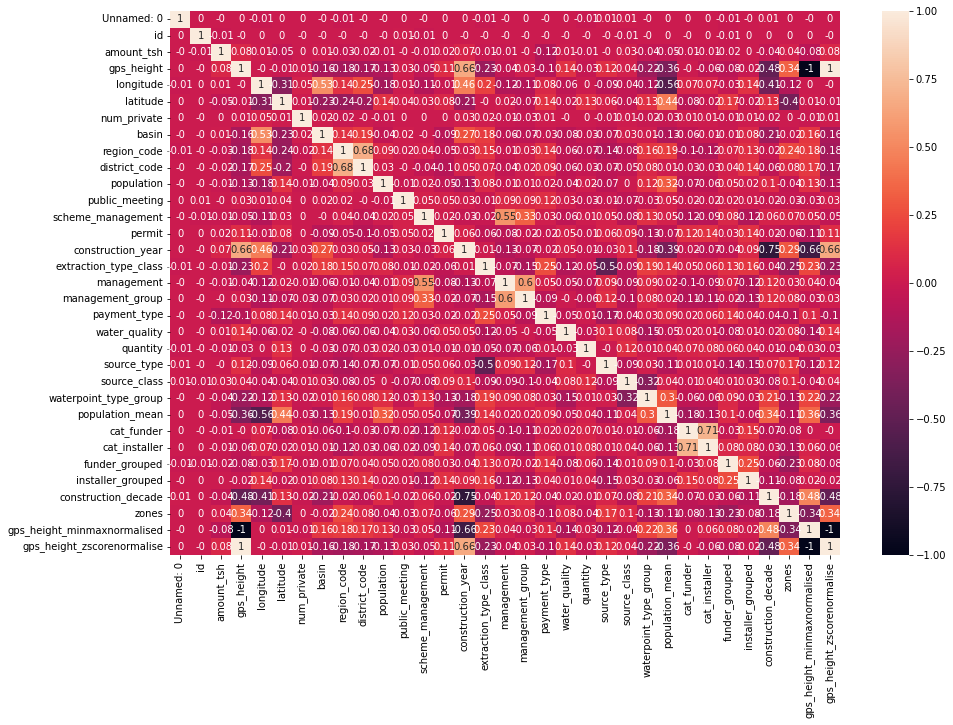

In [71]:
# Author [Jason]

# Correlation Matrix
plt.figure(figsize=(15,10))
features = df.drop(columns = ['outcome'])
matrix = features.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

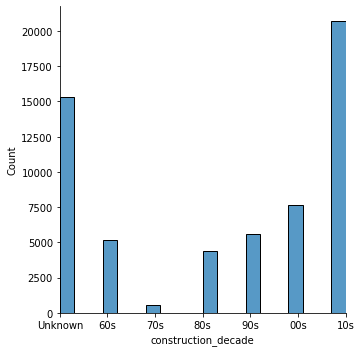

In [72]:
ax = sns.displot(data=df, x='construction_decade')
plt.xlim(0,6)
ax.set_xticklabels(['Unknown', '60s', '70s', '80s', '90s', '00s', '10s'])
plt.show()

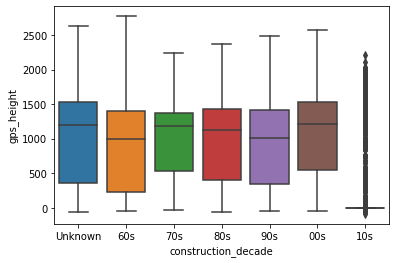

In [73]:
ax = sns.boxplot(data=df, x='construction_decade', y='gps_height')
ax.set_xticklabels(['Unknown', '60s', '70s', '80s', '90s', '00s', '10s'])
plt.show()

There doesn't seem to be a significant change in decade and gps_height.
Add more to here if we want to test out any other correlations between features.

# 2 Feature Engineering

In [74]:
# From here: https://github.com/BrendaLoznik/waterpumps

df['recorded_year'] = pd.DatetimeIndex(df ['date_recorded']).year
df['age'] = df['recorded_year'] - df['construction_year']
df = df.drop('recorded_year',axis=1)

In [75]:
# From here: https://github.com/BrendaLoznik/waterpumps

df['month'] = pd.DatetimeIndex(df['date_recorded']).month

# season encoder
# 1: 'short dry', 2: 'long rain', 3: 'long dry', 4: 'short rain'
season_mapper = {1: 1,2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3,
                 8: 3, 9: 3, 10: 3, 11: 4, 12: 4}
#.p feature values to scale
df['season']=df['month'].replace(season_mapper)
df=df.drop('month', axis=1)

In [99]:
# Author [Tom]

df['consistent_water'] = np.where(df['quantity'] == 1, 1, 0)

# 3 Feature Importance

## 3.1 Random Forest

In [105]:
df_test = df.drop(columns = ['id', 'date_recorded', 'wpt_name','num_private','subvillage','region_code','district_code','lga','ward','recorded_by',
                            'scheme_name','extraction_type','extraction_type_group','payment','quality_group','quantity_group',
                            'source','waterpoint_type','status_group','construction_year','region','funder','installer',
                            'Unnamed: 0'])

In [106]:
# Author [Jason]

target = df_test['outcome']
features = df_test.drop(columns=['outcome'])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

Text(0.5, 0, 'Random Forest Feature Importance')

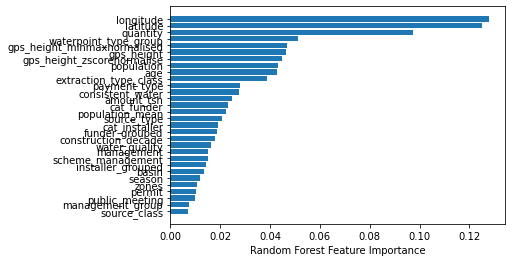

In [107]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(features.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")